In [1]:
from pathlib import Path
import numpy as np

from my_types import Quat, ScalarBatch, QuatBatch
from io_csv import load_gyro_base, load_ref
from pipelines import integrate_gyro
from evaluation import calc_angle_err, print_err_status, save_err_csv, plot_err_from_csv

In [2]:
root: Path = Path.cwd().parent
run_dir: Path = root / "data" / "21:08_oct_07_2025_5min"

ori_path: Path = run_dir / "Orientation.csv"
gyro_path: Path = run_dir / "Gyroscope.csv"

for p in [ori_path, gyro_path]:
        if not p.exists():
                raise FileNotFoundError(f"File not found: {p}")

In [3]:
t_src_gyro, w_src_gyro, dt, t_new, w_avg_gyro = load_gyro_base(gyro_path)

q_ref_interp = load_ref(ori_path, t_new)
q_ref_interp /= np.linalg.norm(q_ref_interp, axis=1, keepdims=True)

In [4]:
q0: Quat = q_ref_interp[0].copy()
q_gyro: QuatBatch = integrate_gyro(q0, w_avg_gyro, dt)

angle_err_gyro: ScalarBatch = calc_angle_err(q_gyro, q_ref_interp)
print_err_status("Gyro only", angle_err_gyro)

Gyro only angle error in rad — min/max/mean
0.016900799939842653 1.0850920070565426 0.5475108313340219

Gyro only angle error in deg — min/max/mean
0.9683445069479396 62.171192387719636 31.370059873138523


In [5]:
out_dir: Path = root / "output"
out_dir.mkdir(parents=True, exist_ok=True)
out_path: Path = out_dir / "01_angle_err_gyro.csv"
save_err_csv(out_path, t_new, angle_err_gyro)

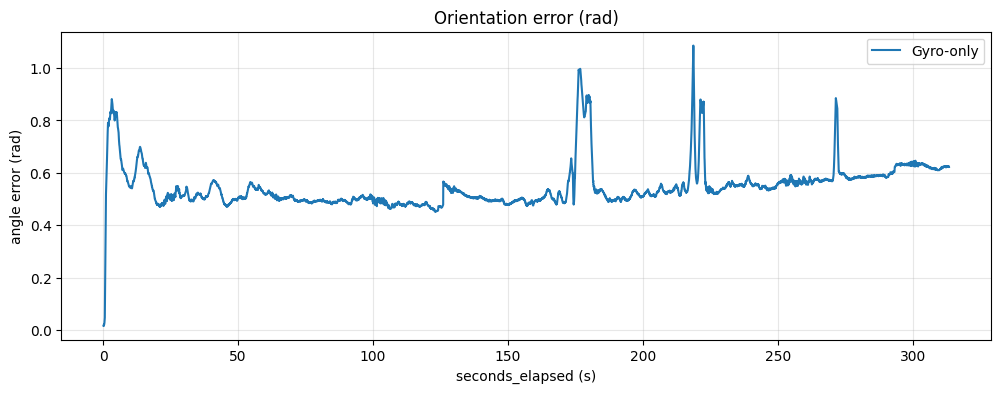

In [6]:
out_gyro_path = out_dir / "01_angle_err_gyro.csv"

plot_err_from_csv([
        ("Gyro-only", out_gyro_path)
])